# Lab Course Machine Learning
# Exercise Sheet 8
January 5th, 2022

Syed Wasif Murtaza Jafri-311226

## Exercise 1: Optical Character Recognition via Neural Networks

In [23]:
import numpy as np
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
plt.rcParams['figure.figsize'] = (10 ,8)
from sympy import symbols, diff
import pandas as pd
import math
import warnings
import itertools
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit
import torch.nn.functional as F
from torchvision import transforms
import os
import math
from torch.utils.data.sampler import SequentialSampler
import torch
from torch import nn
from torch.utils.data import DataLoader,Dataset
import cv2
import os
from sklearn.metrics import accuracy_score

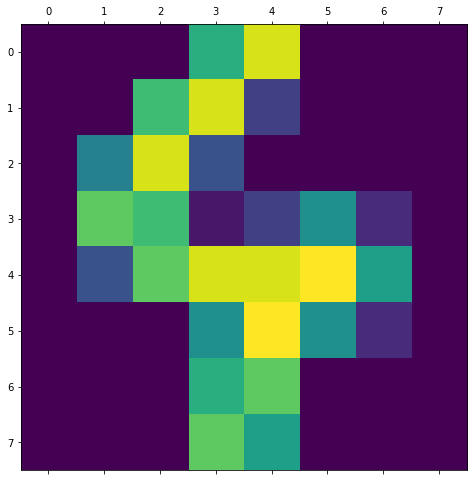

In [7]:
digits = load_digits(as_frame=False)
#plt.gray()
plt.matshow(digits.images[110])
plt.show()

In [8]:
X = digits.data

In [9]:
Y = digits.target
Y = Y.reshape(len(Y),1)


In [10]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y,test_size=0.2,random_state=3116)

In [11]:
clf = MLPClassifier(random_state=3116, max_iter=300).fit(X_train, y_train)

In [12]:
clf.predict_proba(X_test[:1])

array([[2.54100615e-08, 2.62938165e-08, 2.13561410e-15, 4.73356379e-20,
        9.99999868e-01, 3.41843016e-11, 1.40238884e-08, 6.61206535e-08,
        6.16084626e-12, 1.16212870e-11]])

In [13]:
clf.predict(X_test[:1])

array([4])

In [14]:
clf.predict(X_test[:5, :])

array([4, 5, 2, 3, 3])

In [15]:
clf.score(X_test, y_test)

0.9666666666666667

In [16]:
def get_best_params(train_x, train_y,hidden_layer_sizes_range,batch_size_range):
    param_grid = dict(hidden_layer_sizes=hidden_layer_sizes_range, batch_size=batch_size_range)

    cv = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42) # stratifying sample for crossvalidation as test size 20% and divinding it into two parts
    # for param grid calling GridSearchCV with penalty(for specifying model) and diff hyper params in grid
    grid = GridSearchCV(MLPClassifier(random_state=3116, max_iter=500), param_grid=param_grid, cv=cv,return_train_score=True, n_jobs=14, verbose=10) 
    grid.fit(train_x, train_y)

    print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

    scores = []
    # to calculate test and train score for each setting in parameter and adding it to scores list
    for i,j,k in zip (grid.cv_results_['params'],grid.cv_results_['mean_test_score'],grid.cv_results_['mean_train_score']):
        scores.append([j,k,i['hidden_layer_sizes'],i['batch_size']])
    hidden_layer_sizes_best = grid.best_params_['hidden_layer_sizes']
    batch_sizebest = grid.best_params_['batch_size']

    clf = MLPClassifier(hidden_layer_sizes =hidden_layer_sizes_best,batch_size=batch_sizebest)

    return clf,np.array(scores),hidden_layer_sizes_best,batch_sizebest

In [33]:
hidden_layer_sizes_range = [2, 16, 32, 64,100]
batch_size_range =[16, 32, 64,128,264,528]
clf,scores,hidden_layer_sizes_best,batch_sizebest = get_best_params(X_train, y_train,hidden_layer_sizes_range,batch_size_range)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done   4 tasks      | elapsed:    6.9s
[Parallel(n_jobs=14)]: Done  13 tasks      | elapsed:    9.5s
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:   13.2s
[Parallel(n_jobs=14)]: Done  33 tasks      | elapsed:   16.4s
[Parallel(n_jobs=14)]: Done  40 out of  60 | elapsed:   17.9s remaining:    8.9s
[Parallel(n_jobs=14)]: Done  47 out of  60 | elapsed:   19.7s remaining:    5.4s
[Parallel(n_jobs=14)]: Done  54 out of  60 | elapsed:   21.0s remaining:    2.2s
[Parallel(n_jobs=14)]: Done  60 out of  60 | elapsed:   21.7s finished


The best parameters are {'batch_size': 16, 'hidden_layer_sizes': 100} with a score of 0.98


In [34]:
clf.fit(X_train, y_train)

MLPClassifier(batch_size=16, hidden_layer_sizes=100)

In [35]:
y_pred = clf.predict(X_test)

In [36]:
acc = accuracy_score(y_test, y_pred)

In [37]:
print('Test Accuracy::',acc)

Test Accuracy:: 0.9666666666666667


In [38]:
print("The best parameters are: batch_size = %i and  hidden_layer_sizes = %i" % (batch_sizebest,hidden_layer_sizes_best))

The best parameters are: batch_size = 16 and  hidden_layer_sizes = 100


### Exercise 2: End-to-End Self-Driving via Convolutional Neural Networks

In [80]:

device = "cuda" if torch.cuda.is_available() else "cpu"
class Dataset(Dataset):
    
    def __init__(self):
        #defaultdirectorywheredataisloaded
        self.filepath='driving_dataset/'
        self.filenames=os.listdir(self.filepath)
        self.xs = []
        self.ys = []
        with open("angles.txt") as f:
            for line in f:
                self.xs.append("driving_dataset/" + line.split()[0])
                self.ys.append(float(line.split()[1]) * 3.14159265 / 180)
    
    def __len__(self):
        return len(self.filenames)
        
    def __getitem__(self,index):

        filename=self.filenames[index]
        img=cv2.imread(self.filepath+filename)
        height, width, channels = img.shape
        #print(height,width,channels)
        #Resizingimagesto(32,32)
        resized=cv2.resize(img,(66,200),interpolation=cv2.INTER_AREA)
        transform_norm = transforms.Compose([
            transforms.ToTensor()
        ])
        #to Tensor
        tensorImg2= transform_norm(resized)
     
        mean = tensorImg2.mean([1,2])
        std = tensorImg2.std([1,2])

        transform_norm = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ])
        norm_tensorImg2= transform_norm(resized)

        return norm_tensorImg2.float(),torch.tensor([self.ys[index]])
        
class ConvNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3, 24, 5,stride=(2, 2))
        self.conv2 = nn.Conv2d(24, 36, 5,stride=(2, 2))
        self.conv3 = nn.Conv2d(36, 48, 5,stride=(2, 2))
        self.conv4 = nn.Conv2d(48, 64, 3)
        self.conv5 = nn.Conv2d(64, 64, 3)
        self.fc1 = nn.Linear(64 * 18 * 1, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 10)
        self.out = nn.Linear(10, 1)
    def forward(self,x):
        # 
        # input x size : torch.Size([60, 3, 200, 66])
        
        # 5 Convolution Layers
        x = F.relu(self.conv1(x)) # 1 CV 1 torch.Size([60, 24, 98, 31])
        x = F.relu(self.conv2(x)) #  CV 2  torch.Size([60, 36, 47, 14])
        x = F.relu(self.conv3(x)) #  CV 3  torch.Size([60, 36, 47, 14])
        x = F.relu(self.conv4(x)) # #  CV 4  torch.Size([60, 64, 20, 3])
        x = F.relu(self.conv5(x)) #  CV 5  torch.Size([60, 64, 18, 1])
        
        x = x.view(-1, 64 * 18 * 1) # flatten  torch.Size([60, 1152])
        
        # 3 Fully connected  Layers
        x = F.relu(self.fc1(x)) # torch.Size([60, 100])
        x = F.relu(self.fc2(x)) #  torch.Size([60, 50])
        x = F.relu(self.fc3(x)) #  torch.Size([60, 10])
        
        # Output layer with activation function
        x = F.tanh(self.out(x)) #  out  torch.Size([60, 1])
        return x


In [154]:
dataset=Dataset()

batch_size = 60
shuffle_dataset = False
random_seed= 31142
num_epochs = 5

# Creating data indices for training and validation splits:
dataset_size = len(dataset)

indices = list(range(dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
    
testSplitRatio = 10000/dataset_size
validationSplitRatio = 10000/dataset_size
trainSplitRation = 1-testSplitRatio-validationSplitRatio

train_indices = indices[0:math.floor(dataset_size*trainSplitRation)]
val_indices = indices[math.floor(dataset_size*trainSplitRation):math.floor(dataset_size*(trainSplitRation+validationSplitRatio))]
test_indices = indices[math.floor(dataset_size*(trainSplitRation+validationSplitRatio)):]


train_sampler = SequentialSampler(train_indices)
valid_sampler = SequentialSampler(val_indices)
test_sampler = SequentialSampler(test_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
                                           sampler=train_sampler,shuffle=False)
validation_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                                sampler=valid_sampler,shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset,
                                                sampler=test_sampler,shuffle=False)



10000


In [159]:
n_total_steps = len(train_loader)
net=ConvNet().to(device)
optimizer=torch.optim.Adam(net.parameters(),lr=1e-3)
criterion=torch.nn.MSELoss()
for epoch in range(num_epochs):
    for i,sample_batched in enumerate(train_loader):
        optimizer.zero_grad()
        yhat=net(sample_batched[0].cuda())
        loss=criterion(yhat.squeeze(),sample_batched[1].squeeze().cuda())
        loss.backward(retain_graph=True)
        optimizer.step()
        if (i+1) % 200 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            
print('Finished Training')

Epoch [1/5], Step [200/427], Loss: 0.0612
Epoch [1/5], Step [400/427], Loss: 0.0335
Epoch [2/5], Step [200/427], Loss: 0.0679
Epoch [2/5], Step [400/427], Loss: 0.0315
Epoch [3/5], Step [200/427], Loss: 0.0732
Epoch [3/5], Step [400/427], Loss: 0.0284
Epoch [4/5], Step [200/427], Loss: 0.0737
Epoch [4/5], Step [400/427], Loss: 0.0277
Epoch [5/5], Step [200/427], Loss: 0.0742
Epoch [5/5], Step [400/427], Loss: 0.0271
Finished Training


In [161]:
def MSELoss(yhat,y):
    return torch.mean((yhat-y)**2)
criterion=MSELoss
mse = 0
with torch.no_grad():
    for i,sample_batched in enumerate(test_loader):
        optimizer.zero_grad()
        yhat=net(sample_batched[0].cuda())
        loss=criterion(yhat.squeeze(),sample_batched[1].squeeze().cuda())
        mse += loss
    rmse = torch.sqrt (mse)
    rmseAvg = rmse / len(test_loader)
        

rmseAvg


tensor(0.0077, device='cuda:0')

In [158]:
rmseAvg.item()

0.00759779242798686

In [160]:
print ('RMSE on test images', rmseAvg.item())

RMSE on test images 0.00759779242798686
